In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

models = []
results = []
names = []
scoring = 'accuracy'

In [2]:
df = pd.read_pickle('./processed-data.pkl')

X = df.drop(['outcome'], axis=1).values
y = df['outcome'].values

In [3]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

feature_map_nystroem = Nystroem(gamma=.2, random_state=1, n_components=300)
X_transformed = feature_map_nystroem.fit_transform(X)

#models.append(('GP', GaussianProcessClassifier(), X)) - takes huge memory
models.append(('XGB', XGBClassifier(use_label_encoder=False, objective="multi:softprob"), X))
models.append(('XT', ExtraTreesClassifier(), X))
models.append(('KN', KNeighborsClassifier(), X))
#models.append(('GNB', GaussianNB(), X)) - very poor
models.append(('RF', RandomForestClassifier(), X))
models.append(('DT', DecisionTreeClassifier(), X))
models.append(('MLP', MLPClassifier(), X))
models.append(('LSVC', LinearSVC(), X))
models.append(('LSVC-N', LinearSVC(), X_transformed))
models.append(('SGD', SGDClassifier(), X))
models.append(('SGD-N', SGDClassifier(), X_transformed))

In [4]:
for name, model, X_data in models:
    cv_results = model_selection.cross_val_score(model, X_data, y, cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[20:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

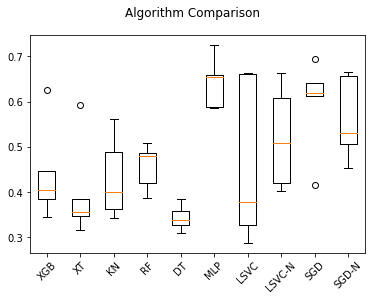

In [6]:
# boxplot algorithm compariso

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 45)
plt.show()